In [ ]:
#Эти скачать, если не в colab
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import chardet
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Эти не надо
import os
import re
import statistics

#Указать путь до данных
# people_path = os.path.abspath("D:\Проекты\ЦУР\Численность населения.csv")
# cur_1_path = os.path.abspath("D:\Проекты\ЦУР\РО ЦУР 1.csv")

people_path = "./Численность населения.csv"
cur_1_path = "./РО ЦУР 1.csv"

In [ ]:
with open(people_path, 'rb') as f:
    result = chardet.detect(f.read())

people_data = pd.read_csv(people_path, delimiter=';', encoding=result['encoding'])
people_data

,Year,Total people,Village people,City people
0,2016,"4 236,0","2 872,1","1 363,9"
1,2017,"4 231,3","2 874,0","1 357,3"
2,2018,"4 220,4","2 871,4","1 349,0"
3,2019,"4 202,3","2 863,7","1 338,6"
4,2020,"4 197,8","2 862,9","1 334,9"
5,2021,"4 181,5","2 850,8","1 330,7"
6,2022,"4 192,3","2 845,4","1 346,9"
7,2023,"4 164,5","2 820,7","1 343,8"


In [ ]:
for column_name in people_data.columns[1:]:
    people_data[column_name] = people_data[column_name].astype(str).str.replace(" ", "").str.replace(",", ".").astype(float)

people_data = people_data.set_index("Year")
people_data

,Total people,Village people,City people
Year,,,
2016,4236.0,2872.1,1363.9
2017,4231.3,2874.0,1357.3
2018,4220.4,2871.4,1349.0
2019,4202.3,2863.7,1338.6
2020,4197.8,2862.9,1334.9
2021,4181.5,2850.8,1330.7
2022,4192.3,2845.4,1346.9
2023,4164.5,2820.7,1343.8


In [ ]:
with open(cur_1_path, 'rb') as f:
    result = chardet.detect(f.read())

cur_1_data = pd.read_csv(cur_1_path, delimiter=';', encoding=result['encoding'])
cur_1_data

,Year,Support,Education,Health,Social,Real money,Low money,Mean money,Money tempo,Pension,Total min,Workers min,Pensioners min,Children min
0,2016,"10,1","23,4","27,7",17,"96,7","14,2","26 655,40","103,2","141,6",9 565,10 170,7 753,10 021
1,2017,"11,4","24,1",21,"21,9","100,6","13,9","27 741,40","104,1","105,6",9 667,10 280,7 832,10 126
2,2018,"9,7","27,4",26,"23,7","102,3","13,2","29 097,10","104,9",101,9 675,10 282,7 843,10 153
3,2019,"9,6","24,5","24,2","20,6","101,2","13,3","30 865,80","106,1","103,9",10 337,11 013,8 384,10 733
4,2020,"10,1","22,5",26,"23,1","98,6",13,"31 519,40","102,1","100,3",10 793,11 481,8 722,11 329
5,2021,"9,3","21,8",26,"22,1","103,5",12,"35 049,70","111,2","98,5",11 053,11 753,9 445,11 642
6,2022,"10,1","22,3","22,3","23,3","100,7","10,5","40 008,00","114,1","101,5",13 085,14 263,11 253,13 319


In [ ]:
for column_name in cur_1_data.columns[1:]:
    cur_1_data[column_name] = cur_1_data[column_name].astype(str).str.replace(" ", "").str.replace(",", ".").astype(float)

cur_1_data = cur_1_data.set_index("Year")
cur_1_data

,Support,Education,Health,Social,Real money,Low money,Mean money,Money tempo,Pension,Total min,Workers min,Pensioners min,Children min
Year,,,,,,,,,,,,,
2016,10.1,23.4,27.7,17.0,96.7,14.2,26655.4,103.2,141.6,9565.0,10170.0,7753.0,10021.0
2017,11.4,24.1,21.0,21.9,100.6,13.9,27741.4,104.1,105.6,9667.0,10280.0,7832.0,10126.0
2018,9.7,27.4,26.0,23.7,102.3,13.2,29097.1,104.9,101.0,9675.0,10282.0,7843.0,10153.0
2019,9.6,24.5,24.2,20.6,101.2,13.3,30865.8,106.1,103.9,10337.0,11013.0,8384.0,10733.0
2020,10.1,22.5,26.0,23.1,98.6,13.0,31519.4,102.1,100.3,10793.0,11481.0,8722.0,11329.0
2021,9.3,21.8,26.0,22.1,103.5,12.0,35049.7,111.2,98.5,11053.0,11753.0,9445.0,11642.0
2022,10.1,22.3,22.3,23.3,100.7,10.5,40008.0,114.1,101.5,13085.0,14263.0,11253.0,13319.0


In [ ]:
data = people_data.join(cur_1_data)
data

,Total people,Village people,City people,Support,Education,Health,Social,Real money,Low money,Mean money,Money tempo,Pension,Total min,Workers min,Pensioners min,Children min
Year,,,,,,,,,,,,,,,,
2016,4236.0,2872.1,1363.9,10.1,23.4,27.7,17.0,96.7,14.2,26655.4,103.2,141.6,9565.0,10170.0,7753.0,10021.0
2017,4231.3,2874.0,1357.3,11.4,24.1,21.0,21.9,100.6,13.9,27741.4,104.1,105.6,9667.0,10280.0,7832.0,10126.0
2018,4220.4,2871.4,1349.0,9.7,27.4,26.0,23.7,102.3,13.2,29097.1,104.9,101.0,9675.0,10282.0,7843.0,10153.0
2019,4202.3,2863.7,1338.6,9.6,24.5,24.2,20.6,101.2,13.3,30865.8,106.1,103.9,10337.0,11013.0,8384.0,10733.0
2020,4197.8,2862.9,1334.9,10.1,22.5,26.0,23.1,98.6,13.0,31519.4,102.1,100.3,10793.0,11481.0,8722.0,11329.0
2021,4181.5,2850.8,1330.7,9.3,21.8,26.0,22.1,103.5,12.0,35049.7,111.2,98.5,11053.0,11753.0,9445.0,11642.0
2022,4192.3,2845.4,1346.9,10.1,22.3,22.3,23.3,100.7,10.5,40008.0,114.1,101.5,13085.0,14263.0,11253.0,13319.0
2023,4164.5,2820.7,1343.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna()
data

,Total people,Village people,City people,Support,Education,Health,Social,Real money,Low money,Mean money,Money tempo,Pension,Total min,Workers min,Pensioners min,Children min
Year,,,,,,,,,,,,,,,,
2016,4236.0,2872.1,1363.9,10.1,23.4,27.7,17.0,96.7,14.2,26655.4,103.2,141.6,9565.0,10170.0,7753.0,10021.0
2017,4231.3,2874.0,1357.3,11.4,24.1,21.0,21.9,100.6,13.9,27741.4,104.1,105.6,9667.0,10280.0,7832.0,10126.0
2018,4220.4,2871.4,1349.0,9.7,27.4,26.0,23.7,102.3,13.2,29097.1,104.9,101.0,9675.0,10282.0,7843.0,10153.0
2019,4202.3,2863.7,1338.6,9.6,24.5,24.2,20.6,101.2,13.3,30865.8,106.1,103.9,10337.0,11013.0,8384.0,10733.0
2020,4197.8,2862.9,1334.9,10.1,22.5,26.0,23.1,98.6,13.0,31519.4,102.1,100.3,10793.0,11481.0,8722.0,11329.0
2021,4181.5,2850.8,1330.7,9.3,21.8,26.0,22.1,103.5,12.0,35049.7,111.2,98.5,11053.0,11753.0,9445.0,11642.0
2022,4192.3,2845.4,1346.9,10.1,22.3,22.3,23.3,100.7,10.5,40008.0,114.1,101.5,13085.0,14263.0,11253.0,13319.0


In [ ]:
def build_plots(data):
    index = 0
    fig, axs = plt.subplots(len(data.columns)//2, 2, figsize=(20,15))

    for column in data.columns:
        axs[index//2][ index%2].plot(data[column])
        axs[index//2][ index%2].set_title(column)
        index += 1
    plt.show()

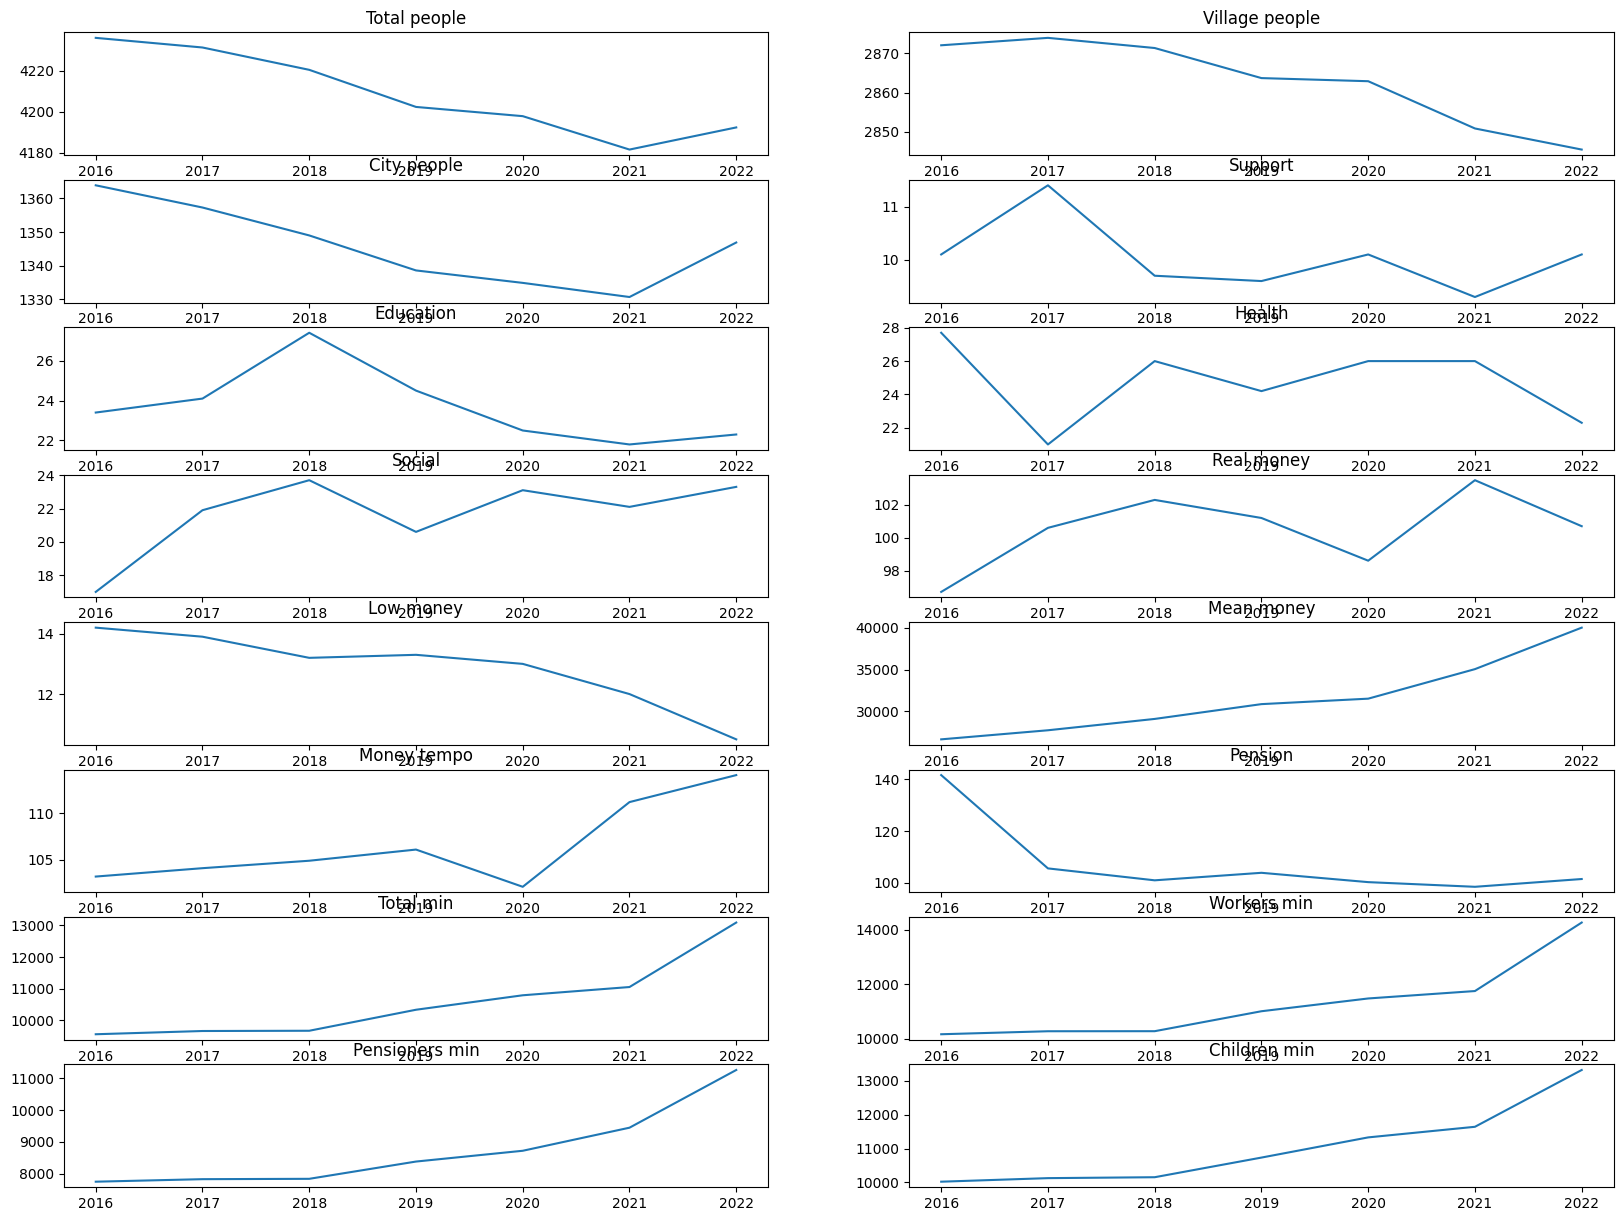

In [ ]:
build_plots(data)

In [ ]:
col_names = data.columns.copy(deep=True)

In [ ]:
TRAIN_SPLIT = 4

In [ ]:
# data = data.values
# data_mean = data[:TRAIN_SPLIT].mean()
# data_std = data[:TRAIN_SPLIT].std()
# data = (data-data_mean)/data_std

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
data = sc.fit_transform(data)

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [ ]:
data.shape

(7, 16)

In [ ]:
past_history = 2
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(data, data[:, :], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(data, data[:, :],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [ ]:
x_train_single.shape

(2, 2, 16)

In [ ]:
y_train_single.shape

(2, 16)

In [ ]:
x_val_single.shape

(1, 2, 16)

In [ ]:
y_val_single.shape

(1, 16)

In [ ]:
BATCH_SIZE = 2
BUFFER_SIZE = 2

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [ ]:
single_step_history = single_step_model.fit(train_data_single, epochs=100,
                                            steps_per_epoch=3,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/100
3/3 [==============================] - 3s 286ms/step - loss: 0.3853 - val_loss: 0.5044
Epoch 2/100
3/3 [==============================] - 0s 49ms/step - loss: 0.2834 - val_loss: 0.4637
Epoch 3/100
3/3 [==============================] - 0s 38ms/step - loss: 0.2648 - val_loss: 0.4546
Epoch 4/100
3/3 [==============================] - 0s 40ms/step - loss: 0.2634 - val_loss: 0.4465
Epoch 5/100
3/3 [==============================] - 0s 78ms/step - loss: 0.2620 - val_loss: 0.4392
Epoch 6/100
3/3 [==============================] - 0s 77ms/step - loss: 0.2605 - val_loss: 0.4337
Epoch 7/100
3/3 [==============================] - 0s 42ms/step - loss: 0.2598 - val_loss: 0.4337
Epoch 8/100
3/3 [==============================] - 0s 80ms/step - loss: 0.2598 - val_loss: 0.4337
Epoch 9/100
3/3 [==============================] - 0s 92ms/step - loss: 0.2598 - val_loss: 0.4337
Epoch 10/100
3/3 [==============================] - 0s 43ms/step - loss: 0.2598 - val_loss: 0.4337
Epoch 11/100
3/3 [

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Потери на этапе обучения')
  plt.plot(epochs, val_loss, 'r', label='Потери на этапе проверки')
  plt.title(title)
  plt.legend()

  plt.show()

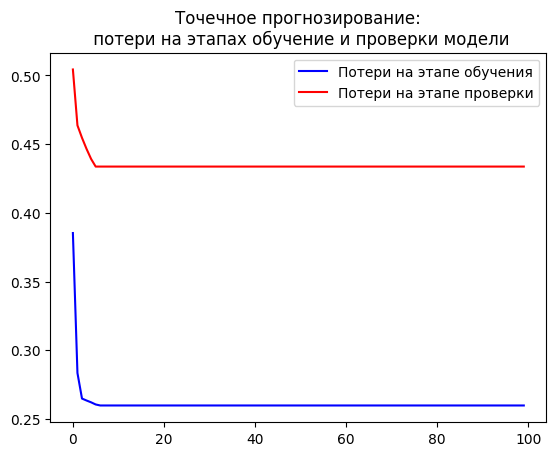

In [ ]:
plot_train_history(single_step_history,
                   'Точечное прогнозирование:\n потери на этапах обучение и проверки модели')

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

def show_plot(plot_data, delta, title):
  labels = ['История', 'Истинное будущее значение', 'Прогноз модели']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], future+1])
  plt.xlabel('Временной интервал')
  return plt

1/1 [==============================] - 0s 468ms/step


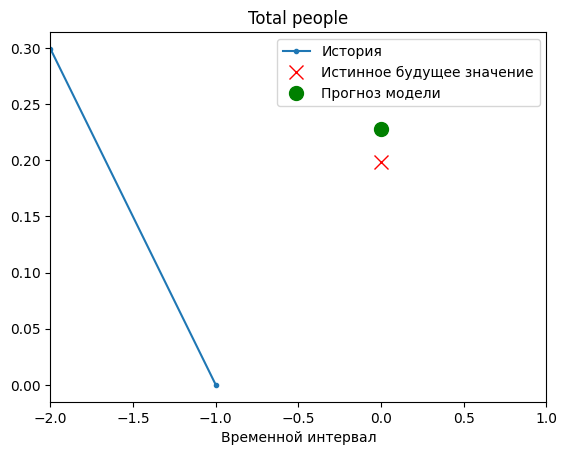

1/1 [==============================] - 0s 24ms/step


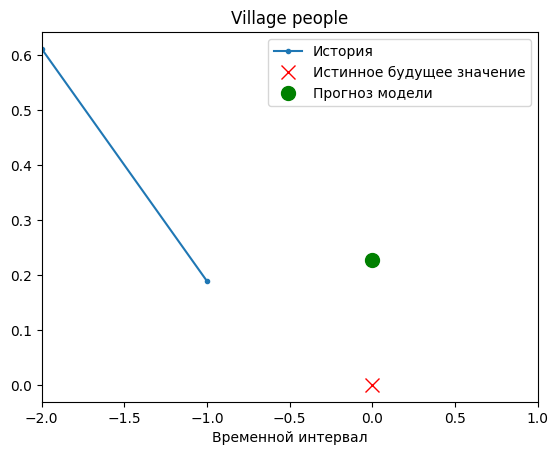

1/1 [==============================] - 0s 23ms/step


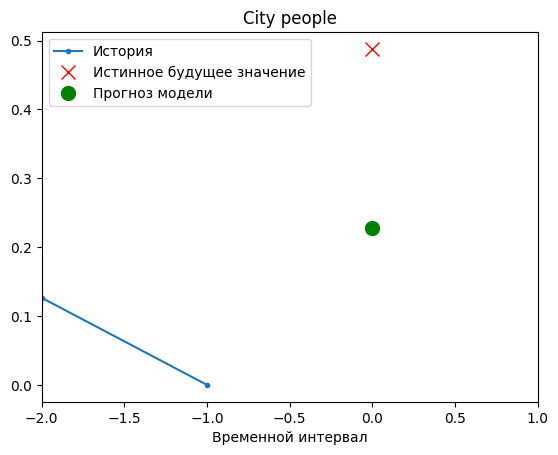

1/1 [==============================] - 0s 25ms/step


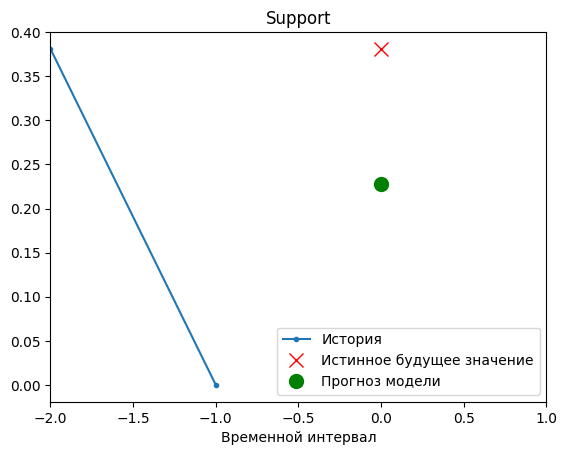

1/1 [==============================] - 0s 26ms/step


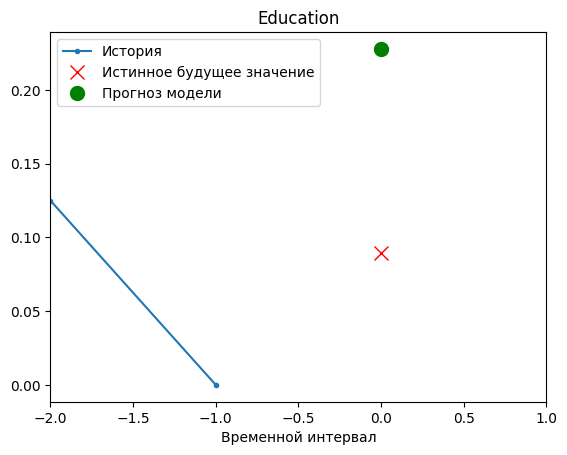

1/1 [==============================] - 0s 24ms/step


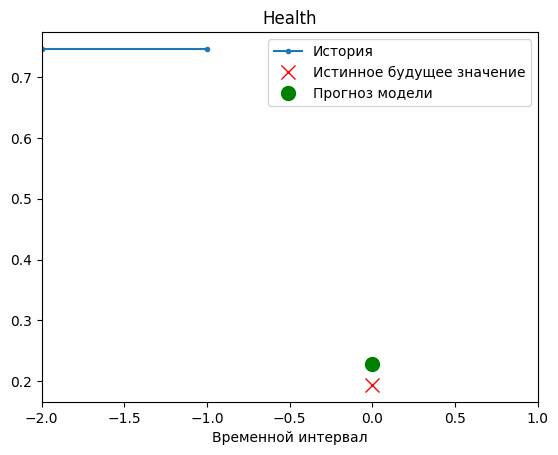

1/1 [==============================] - 0s 24ms/step


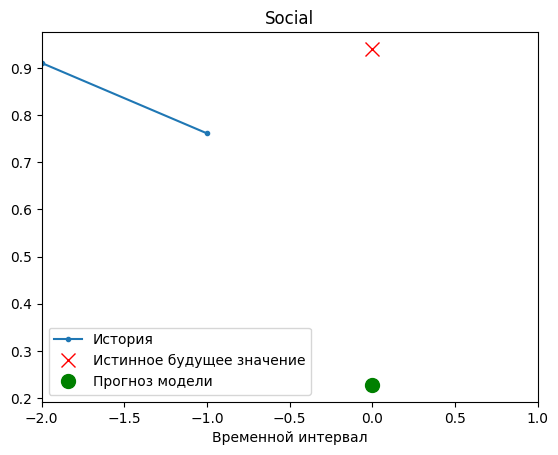

1/1 [==============================] - 0s 29ms/step


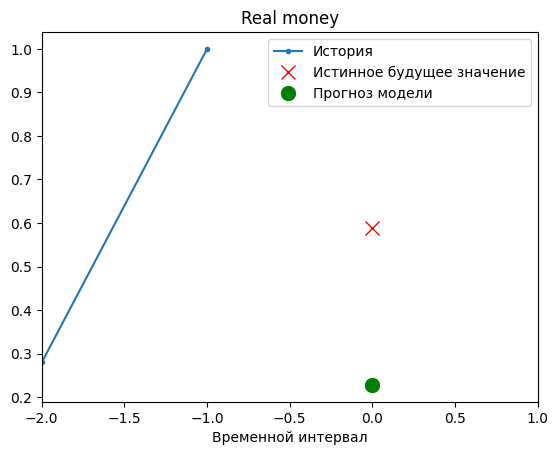

1/1 [==============================] - 0s 24ms/step


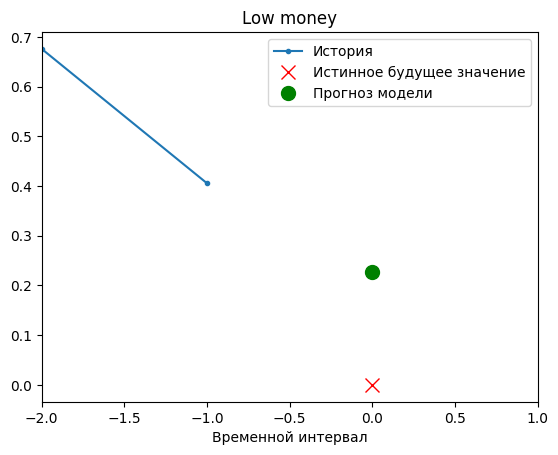

1/1 [==============================] - 0s 23ms/step


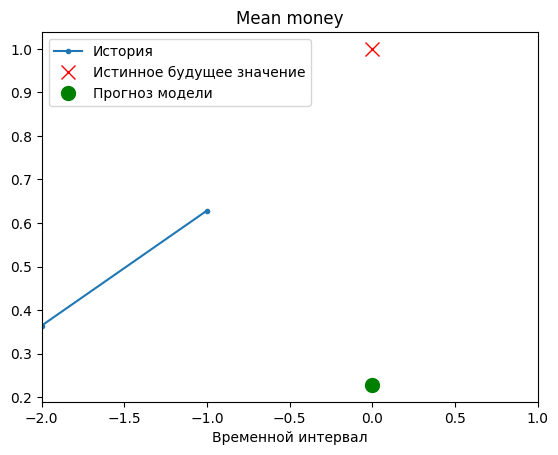

1/1 [==============================] - 0s 25ms/step


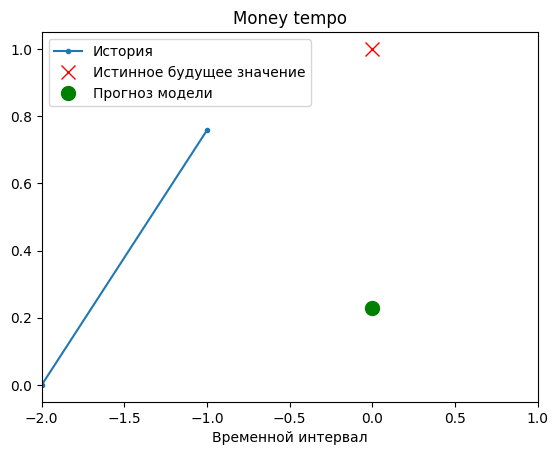

1/1 [==============================] - 0s 26ms/step


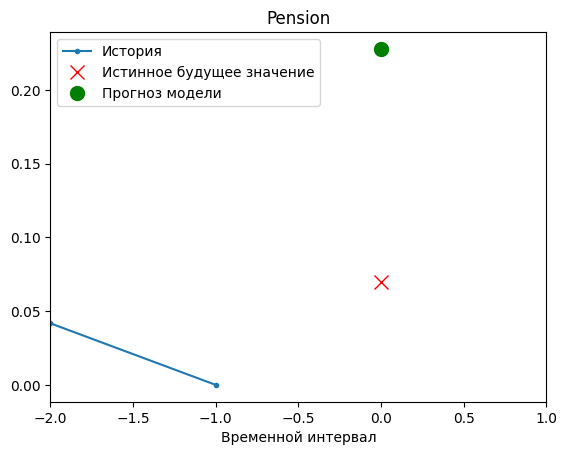

1/1 [==============================] - 0s 27ms/step


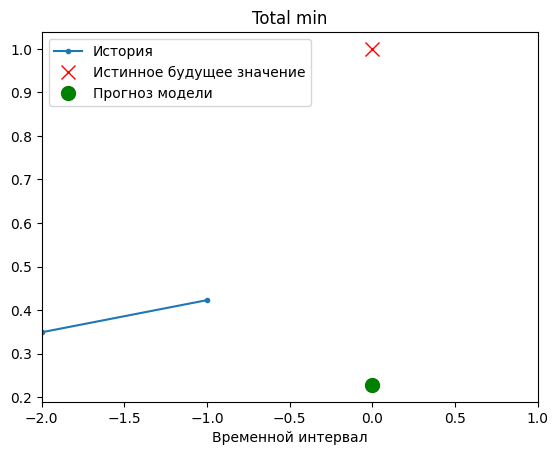

1/1 [==============================] - 0s 26ms/step


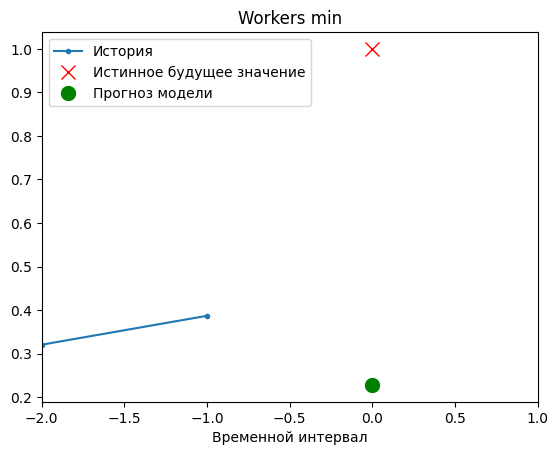

1/1 [==============================] - 0s 27ms/step


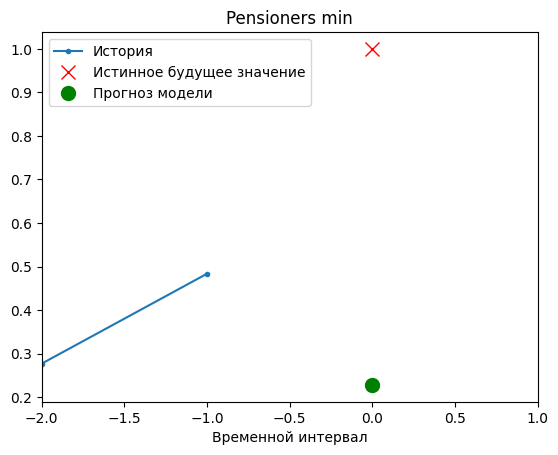

1/1 [==============================] - 0s 23ms/step


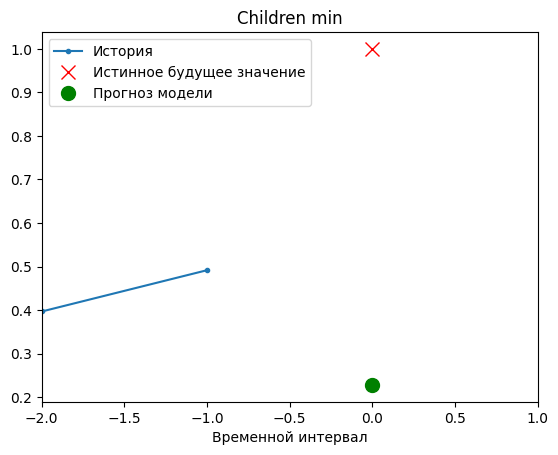

In [ ]:
for x, y in val_data_single.take(1):
  for k in range(16):
    plot = show_plot([x[0][:, k].numpy(), y[0][k].numpy(),
                      single_step_model.predict(x)[0]], 0,
                    col_names[k])
    plot.show()